<a href="https://colab.research.google.com/github/201524495/201524495/blob/main/Practice_1_250707_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 1
- python으로 구현하기, numpy 사용해서 구현하기
- random experiment, random variable simulation
- visualization

## 시작하기 전에:
Python에서 데이터를 다룰 때 자주 쓰는
- `random` module
- `numpy` library



In [ ]:
import random

a = [1, 2, 3, 4, 5, 6]
for _ in range(7):
  print(random.choice(a))  # with replacement

1
6
2
4
3
2
4


In [ ]:
import random

a = [1, 2, 3, 4, 5, 6]
print(random.sample(a, 4))  # without replacement
print(random.sample(a, 6))  # without replacement

[2, 1, 6, 5]
[3, 4, 2, 5, 1, 6]


In [ ]:
import random
r1 = random.randint(5, 15)
print(r1)

r2 = random.random()
print(r2) # [0.0, 1.0)
print(round(r2, 3))

8
0.013114189588902203
0.013


Reproducibility 재현성을 위한 `seed`

In [ ]:
import random
# random.seed()
print(random.random())
print(random.random())

0.21672980046384815
0.2794823660111103


In [ ]:
import random
random.seed(5) # seed 고정

print(random.random())
print(random.random())

0.6229016948897019
0.7417869892607294


## Random Experiment

### 예제 1. 동전 던지기 실험

In [ ]:
import random

# 동전 던지기 1번의 Outcome
outcome = [random.choice(['H', 'T'])]
print("동전 던지기 1번 outcome: ", outcome)

# 동전 던지기 10번
results = [random.choice(['H', 'T']) for _ in range(10)]
print("동전 던지기 10번 관찰 결과:", results)

동전 던지기 1번 outcome:  ['H']
동전 던지기 10번 관찰 결과: ['T', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H']


동전을 10번 던졌을 때 앞면이 나올 **Empricial Mean** (표본 평균)
- 관찰한 결과로부터 계산한 값이기 때문에 "Empirical" mean으로 부릅니다.






In [ ]:
empirical_mean = results.count('H') / 10
print(f"10번 던져서 앞면이 나올 empricial mean: {empirical_mean}")

10번 던져서 앞면이 나올 empricial mean: 0.5


**실습 문제 1.**

동전을 1000번 던졌을 때 앞면이 나올 **Empricial Mean** (표본 평균)을 구해봅시다.



In [ ]:
# TODO: code

**실습 문제 2.**

실험을 10,000번, 100,000번으로 늘리면 표본 평균이 어떻게 변하나요?

In [ ]:
# TODO: code

#### 참고: Sample mean convergence

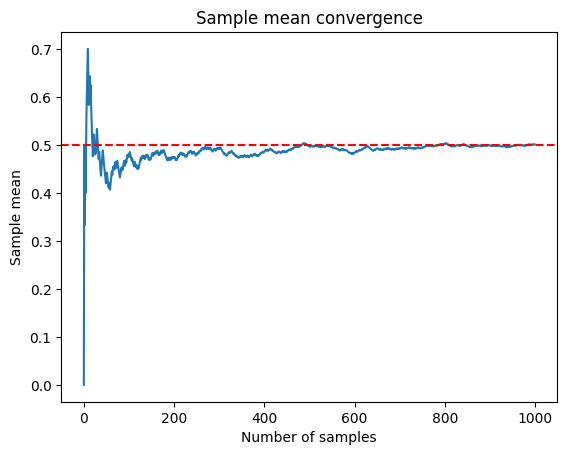

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

random.seed(123)

n = 1000
samples = np.random.choice([0, 1], size=n)  # 0: T, 1: H
sample_means = np.cumsum(samples) / (np.arange(1, n+1))
plt.plot(sample_means)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")
plt.title("Sample mean convergence")
plt.show()

### 예시 2. 주사위 던지기 실험 - plotting과 함께

In [ ]:
# TODO: code

빈도를 보기 쉽게 그래프를 그려봅시다.

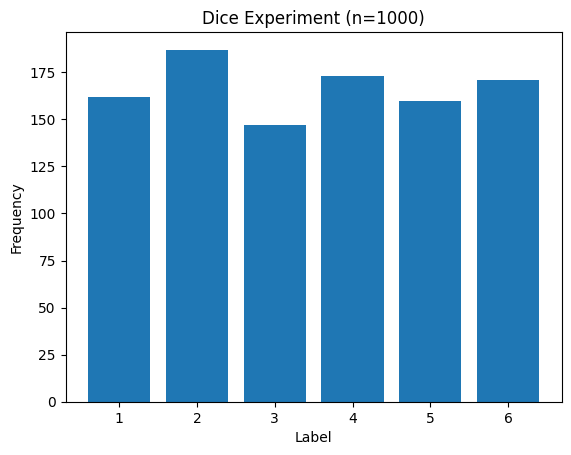

In [ ]:
# bar plot
plt.bar(range(1, 7), counts)
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Dice Experiment (n=1000)")
plt.show()

**실습 문제 3**

주사위를 10,000번 던지면 각 눈(1~6)이 나온 비율을 계산해보고, bar plot으로 시각화해보세요.



In [ ]:
# TODO: code

## `numpy`로 구현해보기

In [ ]:
# 이전 코드
import random

n = 10
results = [random.choice(['H', 'T']) for _ in range(n)]
empirical_mean = results.count('H') / n
print(f"{n}번 던져서 앞면이 나올 empricial mean: {empirical_mean}")

1000번 던져서 앞면이 나올 empricial mean: 0.501


In [ ]:
# numpy로 계산한 코드
import numpy as np  # "import numpy" is okay too!

n = 10
results = np.random.choice(['H', 'T'], size=n)
print(f"관찰된 결과: {results}")
print(f"관찰된 결과가 앞면인 경우: {results == 'H'}") # return boolean values

empirical_mean = np.mean(results == 'H')
print(f"{n}번 던져서 앞면이 나올 empricial mean: {empirical_mean}")

관찰된 결과: ['T' 'T' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H']
관찰된 결과가 앞면인 경우: [False False  True  True False  True  True False  True  True]
10번 던져서 앞면이 나올 empricial mean: 0.6


In [ ]:
# numpy가 편리한 수식 계산 기능을 제공합니다.
samples = [5,6,6,7]
mean_basic1 = (5 + 6 + 6 + 7) / 4
mean_basic2 = sum(samples) / len(samples)

import numpy as np
mean_np = np.mean(samples)

# 세 값이 모두 같은지 확인
print(mean_basic1 == mean_basic2 == mean_np) # True

True


In [ ]:
# 표준편차
samples = [5,6,6,7]
mean_basic1 = (5 + 6 + 6 + 7) / 4
d2 = [(x - mean_basic1) ** 2 for x in samples]
variance = sum(d2) / (len(samples) - 1)
std_basic1 = variance ** 0.5

import numpy as np
std_np = np.std(samples)

# 값이 같은지 확인
print(f"직접 계산한 표본표준편차: {round(std_basic1, 2)}, np.std(samples): {round(std_np, 2)}")
print(std_basic1 == std_np) # False

# NOTE: numpy.std에서 default로 표본표준편차가 아닌 모집단의 표준편차("popluation standard deviation")를 계산합니다.
# 참고: https://numpy.org/doc/stable/reference/generated/numpy.std.html
# 표본표준편차를 계산하고 싶으면 ddof=1 옵션을 써야 합니다. (sample 수 - 1)로 나누기.
import numpy as np
std_np = np.std(samples, ddof=1)

# 값이 같은지 확인
print("np.std(samples, ddof=1): ", round(std_np, 2))
print(std_basic1 == std_np) # True

직접 계산한 표본표준편차: 0.82, np.std(samples): 0.71
False
np.std(samples, ddof=1):  0.82
True


이제부터는 numpy를 적극적으로 활용해봅니다.

## Univariate and Multivariate Random Variables
numpy와 함께 친해지기.

### Univariate random variable

여태까지 본 동전 던지기와 주사위 던지기는 변수가 하나인 univariate random variable입니다.


**실습 문제 4**

일주일 동안의 하루 방문자 수 데이터입니다. 평균, 중앙값, 표준편차를 구해봅시다.

In [ ]:
## 1. Univariate 예시
### 하루 방문자 수 분석
visits = [100, 120, 90, 110, 130, 80, 115]

In [ ]:
# 각 변수의 평균, 분산, 공분산, 상관계수를 구해봅시다. numpy를 사용해도 좋습니다.
# TODO: code

### Multivariate random variable

X = [x1, x2], a 2-dimensional random variable을 가정합시다.

In [ ]:
import numpy as np

# 관찰 세 번을 행렬로 나타냅니다.
X = np.array([
    [1, 4],  # 관찰 1
    [2, 2],  # 관찰 2
    [3, 0]   # 관찰 3
])

# Mean vector
mu = X.mean(axis=0)
print("Mean vector:", mu)  # 2D vector

# X - Mean
X_centered = X - mu

# Covariance matrix
cov_matrix = (X_centered.T @ X_centered) / X.shape[0]  # @: dot product of two matrices
print("Covariance matrix:\n", cov_matrix)

# Covariance matrix with numpy
cov = np.cov(X, rowvar=False, bias=True) # sample 수로 나누기
print("Covariance matrix (numpy):\n", cov)

Mean vector: [2. 2.]
Covariance matrix:
 [[ 0.66666667 -1.33333333]
 [-1.33333333  2.66666667]]
Covariance matrix (numpy):
 [[ 0.66666667 -1.33333333]
 [-1.33333333  2.66666667]]


## Multiple Random Variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션
n = 1000
dice1 = np.random.randint(1, 7, n)
dice2 = np.random.randint(1, 7, n)
print(f"dice1 samples: {dice1[:10]}") # 1000개 중 앞의 10개 샘플 출력하기
print(f"dice2 samples: {dice2[:10]}")

# (recap) 각 변(dice1, dice2)의 평균, 분산, 공분산, 상관계수를 구해봅시다.
# TODO: code

dice1 samples: [1 3 3 1 6 3 5 4 3 5]
dice2 samples: [6 5 2 3 2 6 4 2 3 1]


Bivariate Normal
(dependent variables)



(1000,) (1000,)
[ 1.39916782 -0.65836763  0.72663993 -0.95915676  0.32701716  1.4605684
  1.60900204 -1.00502182  0.46076536  1.77550688]
[ 0.65266712 -0.24308303 -0.1148905  -0.42619697 -0.62898878  0.37350797
  1.96896002 -0.36711232  0.84986857  2.79221447]


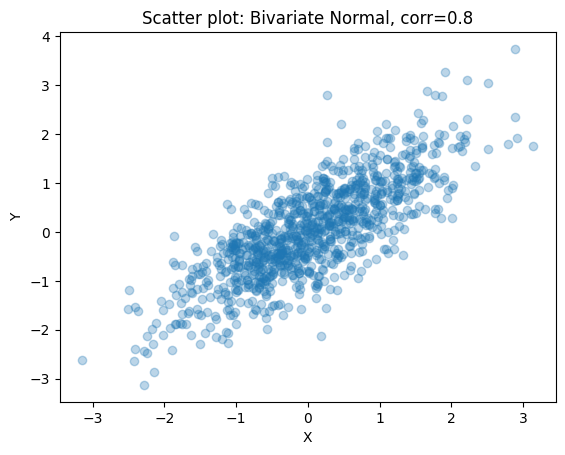

상관계수: 0.7826


In [ ]:
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # 상관계수 0.8
X, Y = np.random.multivariate_normal(mean, cov, n).T # (n=1000, 2)
print(X.shape, Y.shape)

print(X[:10])
print(Y[:10])

plt.scatter(X, Y, alpha=0.3)
plt.title("Scatter plot: Bivariate Normal, corr=0.8")
plt.xlabel("X"); plt.ylabel("Y")
plt.show()

print("상관계수:", round(np.corrcoef(X, Y)[0, 1], 4)) # np.corrcoef(X, Y) returns 2 * 2 matrix.

주사위 3개

In [ ]:
# Sampling
import numpy as np
import pandas as pd

np.random.seed(42)  # 재현성

n_trial = 4
n_dim = 3  # 3개의 주사위

# 데이터 생성: 4 x 3 행렬 (각 행: 한 번의 trial)
samples = np.random.randint(1, 7, size=(n_trial, n_dim))
print(samples)

# pandas 사용
df = pd.DataFrame(samples, columns=['X1', 'X2', 'X3'])
print("주사위 3개 x 4번 결과:\n", df)

[[4 5 3]
 [5 5 2]
 [3 3 3]
 [5 4 3]]
주사위 3개 x 4번 결과:
    X1  X2  X3
0   4   5   3
1   5   5   2
2   3   3   3
3   5   4   3


In [ ]:
# numpy
means_np = np.mean(samples, axis=0)
print("\nSample mean (각 주사위별):\n", means_np)

# 또는 pandas
means_pd = df.mean()
print("\nSample mean (각 주사위별):\n", means_pd)


Sample mean (각 주사위별):
 [4.25 4.25 2.75]

Sample mean (각 주사위별):
 X1    4.25
X2    4.25
X3    2.75
dtype: float64


In [ ]:
# axis=1
############
# numpy
means_np = np.mean(samples, axis=1)
print("\nSample mean (각 순서 별):\n", means_np)

# 또는 pandas
means_pd = df.mean(axis=1)
print("\nSample mean (각 순서 별):\n", means_pd)


Sample mean (각 순서 별):
 [4. 4. 3. 4.]

Sample mean (각 순서 별):
 0    4.0
1    4.0
2    3.0
3    4.0
dtype: float64


In [ ]:
# numpy
cov_matrix = np.cov(samples, rowvar=False)  # (3,3) matrix
print("\nSample covariance matrix:\n", cov_matrix)

# 또는 pandas
print("\nSample covariance matrix (DataFrame):\n", df.cov())


Sample covariance matrix:
 [[ 0.91666667  0.58333333 -0.25      ]
 [ 0.58333333  0.91666667 -0.25      ]
 [-0.25       -0.25        0.25      ]]

Sample covariance matrix (DataFrame):
           X1        X2    X3
X1  0.916667  0.583333 -0.25
X2  0.583333  0.916667 -0.25
X3 -0.250000 -0.250000  0.25


In [ ]:
corr_matrix = np.corrcoef(samples, rowvar=False)  # correlation coefficient -- covariance의 범위를 [-1, 1]로 정규화해준 값입니다.
print("\nSample correlation matrix:\n", corr_matrix)

# 또는
print("\nSample correlation matrix (DataFrame):\n", df.corr())


Sample correlation matrix:
 [[ 1.          0.63636364 -0.52223297]
 [ 0.63636364  1.         -0.52223297]
 [-0.52223297 -0.52223297  1.        ]]

Sample correlation matrix (DataFrame):
           X1        X2        X3
X1  1.000000  0.636364 -0.522233
X2  0.636364  1.000000 -0.522233
X3 -0.522233 -0.522233  1.000000


# 실습 2

## Joint PMF

In [ ]:
import random
import numpy as np

random.seed(123)
np.random.seed(123)

# 두 주사위 실험 - 모든 경우의 joint PMF 계산
joint_counts = {}
n = 10000
for _ in range(n):
    x = random.randint(1, 6)
    y = random.randint(1, 6)
    key = (x, y)
    joint_counts[key] = joint_counts.get(key, 0) + 1

# joint PMF로 변환 -- 빈도 비율 계산
joint_pmf = {k: v / n for k, v in joint_counts.items()}

# (3, 4)가 나올 확률 확인
print("P(X=3, Y=4):", joint_pmf.get((3,4), 0))

P(X=3, Y=4): 0.028


In [ ]:
# 행렬 형태로 보기 with pandas
import pandas as pd
pmf_matrix = pd.DataFrame(0., index=range(1,7), columns=range(1,7))
for (x, y), prob in joint_pmf.items():
    pmf_matrix.loc[x, y] = prob
print(pmf_matrix)

        1       2       3       4       5       6
1  0.0266  0.0300  0.0276  0.0286  0.0268  0.0286
2  0.0279  0.0286  0.0276  0.0252  0.0278  0.0270
3  0.0302  0.0298  0.0274  0.0280  0.0270  0.0278
4  0.0297  0.0250  0.0283  0.0288  0.0266  0.0295
5  0.0257  0.0263  0.0299  0.0271  0.0258  0.0293
6  0.0281  0.0261  0.0277  0.0260  0.0292  0.0284


In [ ]:
# 행렬 형태로 보기 with numpy
n = 10000
X = np.random.randint(1, 7, n)
Y = np.random.randint(1, 7, n)
joint = np.zeros((6,6))
for x, y in zip(X, Y):
    joint[x-1, y-1] += 1  # -1은 Index가 0부터 시작하기 때문에
joint /= n
print(joint)

[[0.026  0.0265 0.0281 0.0296 0.0281 0.0291]
 [0.0305 0.0285 0.0264 0.0273 0.0294 0.0266]
 [0.0279 0.0259 0.0278 0.0283 0.0294 0.0271]
 [0.0273 0.0259 0.0289 0.0267 0.0265 0.0286]
 [0.0248 0.0278 0.0305 0.0311 0.0274 0.028 ]
 [0.0268 0.0267 0.0281 0.0256 0.0283 0.0285]]


**실습 문제 5**

pandas로 구현한 `joint_pmf`**에서** (X+Y=7)인 확률을 구해봅시다.

In [ ]:
# TODO: code

## Marginalization

In [ ]:
# X의 주변분포는 joint pmf에서 y를 모두 합하면 됩니다.
marginal_X = {x: sum([joint_pmf[(x, y)] for y in range(1,7)]) for x in range(1,7)}
print("Marginal P(X):", marginal_X)

# sum(marginal_X.values())

Marginal P(X): {1: 0.16820000000000002, 2: 0.1641, 3: 0.1702, 4: 0.16789999999999997, 5: 0.1641, 6: 0.1655}


1.0

In [ ]:
# with numpy
marg_X = joint.sum(axis=1)
print("Marginal P(X):", marg_X)

Marginal P(X): [0.1667 0.1695 0.1622 0.1671 0.1686 0.1659]


**실습 문제 6**

Margianl P(Y)를 구해봅시다.

In [ ]:
# TODO: code

Joint PMF의 Plot을 그려봅시다.

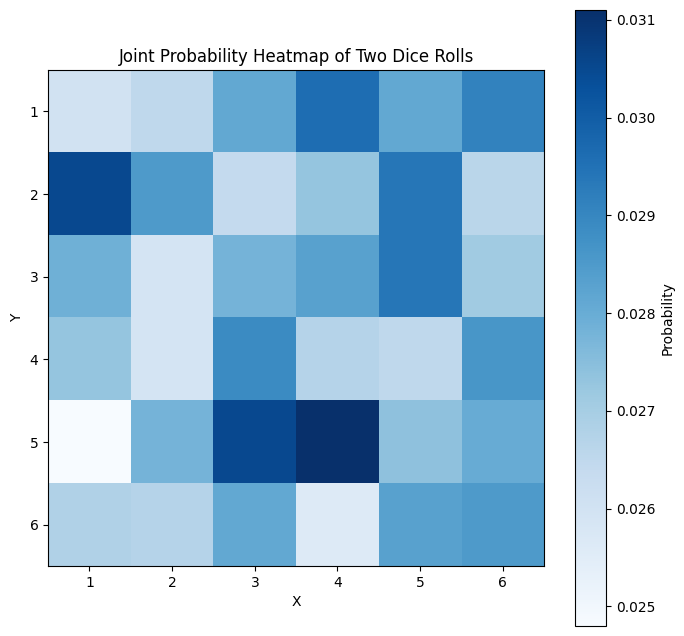

In [ ]:
# 2D heatmap
plt.figure(figsize=(8,8))
plt.imshow(joint, cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(6), np.arange(1,7))  # ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.yticks(np.arange(6), np.arange(1,7))
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label='Probability')
plt.title('Joint Probability Heatmap of Two Dice Rolls')
plt.show()

**실습 문제 7.**
Marginal P(X), Margianl P(Y) 각각에 대해 분포를 plot해봅시다.

In [ ]:
# TODO: code
# bar plot; 다른 plot도 좋습니다!
# Marginal P(X)

In [ ]:
# TODO: code
# bar plot; 다른 plot도 좋습니다!
# Marginal P(Y)

## Joint PDF

예시. 2D Uniform (0≤x≤1, 0≤y≤1)

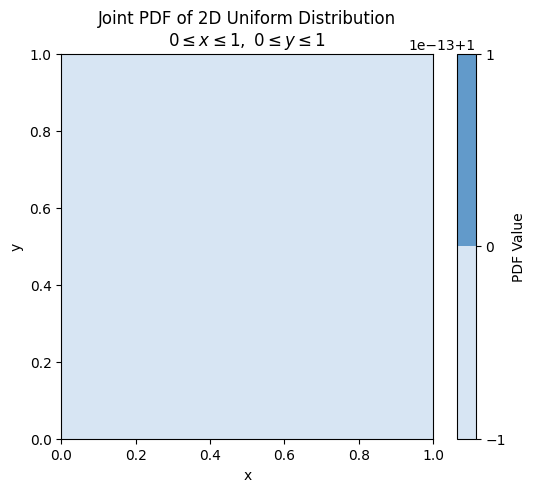

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Joint PDF: 1 inside the square, 0 elsewhere
Z = np.ones_like(X)

plt.figure(figsize=(6,5))
cp = plt.contourf(X, Y, Z, levels=1, cmap='Blues', alpha=0.7)
plt.colorbar(cp, label='PDF Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Joint PDF of 2D Uniform Distribution\n$0\\leq x \\leq 1,\ 0\\leq y \\leq 1$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

**실습 문제 8**

2차원 공간 (0.2≤x≤0.4, 0.5≤y≤0.7)에 들어갈 확률은?

In [ ]:
# TODO: 직접 계산하기

Empirical observation을 통해 구해봅시다.

(Monte Carlo Sampling)

In [ ]:
n = 10000
X = [random.random() for _ in range(n)]
Y = [random.random() for _ in range(n)]


count = sum(1 for x, y in zip(X, Y) if 0.2<=x<=0.4 and 0.5<=y<=0.7)
prob = count / n
print("P(0.2<=X<=0.4, 0.5<=Y<=0.7):", prob)

# numpy
X = np.random.rand(n)
Y = np.random.rand(n)
mask = (0.2 <= X) & (X <= 0.4) & (0.5 <= Y) & (Y <= 0.7)  # 구하는 영역에 있는 (x, y) 샘플들 수를 세기 위함
print("P(0.2<=X<=0.4, 0.5<=Y<=0.7):", mask.mean())

P(0.2<=X<=0.4, 0.5<=Y<=0.7): 0.0389
P(0.2<=X<=0.4, 0.5<=Y<=0.7): 0.042


In [ ]:
# 참고
print((0.2 <= X))  # boolean list
print(sum(0.2 <= X))
print(len(0.2 <= X))
print(np.mean(0.2 <= X)); print((0.2 <= X).mean())  # 빈도 비율

[ True  True  True ...  True  True  True]
7936
10000
0.7936
0.7936


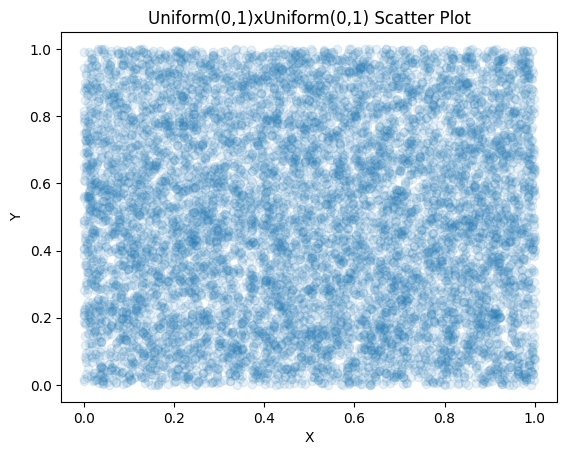

In [ ]:
plt.scatter(X, Y, alpha=0.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Uniform(0,1)xUniform(0,1) Scatter Plot")
plt.show()

## Covariance & Correlation

In [ ]:
# 2개의 랜덤변수 (예: dice1, dice2)
# 각 통계량 정의를 다시 써봅시다
def mean(L):
    return sum(L) / len(L)
def covariance(L1, L2):
    m1, m2 = mean(L1), mean(L2)
    return sum((x-m1)*(y-m2) for x, y in zip(L1, L2)) / len(L1)
def std(L):
    m = mean(L)
    return (sum((x-m)**2 for x in L) / len(L))**0.5
def corr(L1, L2):
    return covariance(L1, L2) / (std(L1)*std(L2))

dice1 = [random.randint(1,6) for _ in range(1000)]
dice2 = [random.randint(1,6) for _ in range(1000)]
print("Covariance:", covariance(dice1, dice2))
print("Correlation:", corr(dice1, dice2))


Covariance: -0.08376599999999995
Correlation: -0.02815428434276465


In [ ]:
# numpy
X = np.random.randint(1,7,1000)
Y = np.random.randint(1,7,1000)
print("Covariance (numpy):", np.cov(X, Y)[0,1])
print("Correlation (numpy):", np.corrcoef(X, Y)[0,1])


Covariance (numpy): 0.09335335335335311
Correlation (numpy): 0.03253432411142602


## Conditional Probability

**실습 문제 9**

두 주사위에서 Y=6일 때 X=3일 확률을 구해봅시다.
두 주사위는 독립적입니다.

In [ ]:
# TODO: 직접 계산하기 (암산 가능!)

**실습 문제 10**

위의 예시와 같이 sampling을 통해서  Y=6일 때 X=3일 확률 확률을 구해봅시다.

In [ ]:
# TODO: code
# 직접 구해도 좋고 numpy를 써도 좋습니다.

## Functions of Two Random Variables

예제: S의 분포 구하기. S = X + Y


In [ ]:
S = [x + y for x, y in zip(X, Y)]

from collections import Counter
cnt = Counter(S)
for s in sorted(cnt):
    print(f"P(S={s}): {cnt[s]/len(S):.3f}")

P(S=2): 0.031
P(S=3): 0.062
P(S=4): 0.100
P(S=5): 0.109
P(S=6): 0.129
P(S=7): 0.166
P(S=8): 0.136
P(S=9): 0.110
P(S=10): 0.087
P(S=11): 0.045
P(S=12): 0.025


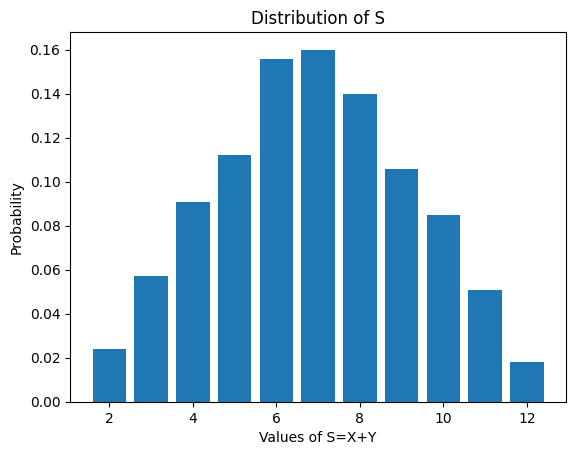

In [ ]:
S = X + Y
values, counts = np.unique(S, return_counts=True)
plt.bar(values, counts / len(S))
plt.xlabel("Values of S=X+Y")
plt.ylabel("Probability")
plt.title("Distribution of S")
plt.show()

**실습 문제 11**

S1 = X - Y, S2 = X * Y
각각에 대해서 분포 plot을 그려봅시다.

In [ ]:
# TODO: plot code
# S1 = X - Y

In [ ]:
# TODO: plot code
# S2 = X * Y

## Bivariate Gaussian Visualization

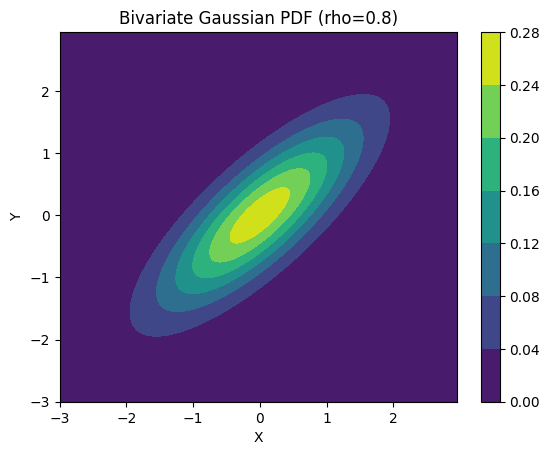

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # 양의 상관관계
x, y = np.mgrid[-3:3:.05, -3:3:.05]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov)
plt.contourf(x, y, rv.pdf(pos))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bivariate Gaussian PDF (rho=0.8)")
plt.colorbar()
plt.show()


**실습 문제 12**

상관계수를 0, -0.8 등으로 바꿔서 그래프 모양이 어떻게 변하는지 확인해봅시다.

In [ ]:
# TODO: plot

In [ ]:
# TODO: plot

In [ ]:
# Solution Notebook: https://shorturl.at/FZ1jN